In [4]:
import os
import cv2
import tqdm
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import seamcarving as sc

%pylab inline

Populating the interactive namespace from numpy and matplotlib


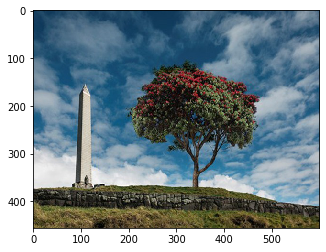

In [5]:
# load image
image_name = "a.jpg"
image_path = os.path.join("images", image_name)
image = sc.load_image(image_path)
sc.show_image_plt(image)

100%|██████████| 100/100 [00:04<00:00, 22.58it/s]


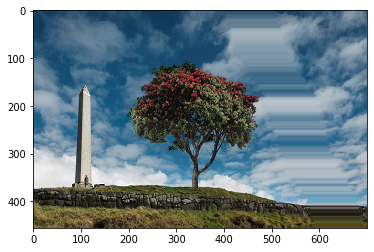

In [6]:
# expend normally
current_image = np.copy(image)
for i in tqdm.tqdm(range(100)):
    current_energy = sc.laplacian_energy(current_image)
    current_seam = sc.seam_with_minimum_energy(current_energy)
    current_image = sc.expend_seam(current_image, current_seam)
sc.show_image_plt(current_image)

100%|██████████| 100/100 [00:00<00:00, 502.64it/s]


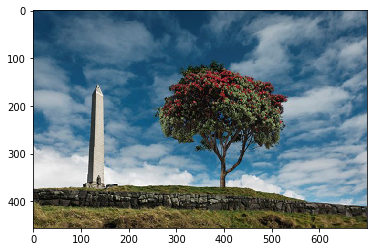

In [8]:
# expend after removing
current_image = np.copy(image)
current_seams = list()
for i in tqdm.tqdm(range(100)):
    current_energy = sc.laplacian_energy(current_image)
    current_seam = sc.seam_with_minimum_energy(current_energy)
    current_image = sc.remove_seam(current_image, current_seam)
    current_seams.append(current_seam)
current_seams = np.asarray(current_seams)
current_seams = sc.relocate_seams(current_seams)
current_image = np.copy(image)
for i in tqdm.tqdm(range(100)):
    current_seam = current_seams[i]
    current_image = sc.expend_seam(current_image, current_seam)
sc.show_image_plt(current_image)